In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      1

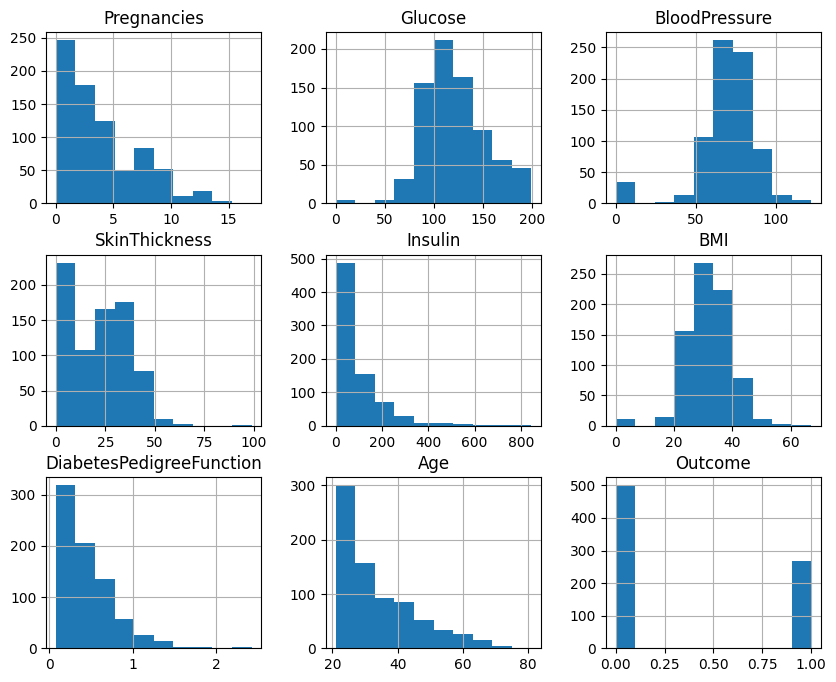


Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Processed Data (First 5 rows of X_train):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.844885 -0.877389      -1.026200      -1.269567 -1.148089 -1.245506   
1     0.342981 -0.548616      -0.033518      -0.017463  1.994354  0.646594   
2    -1.141852  0.437703      -0.364412       1.462295  1.111645  1.432543   
3     0.046014  0.306194      -0.364412      -0.928084  0.123012  0.093519   
4    -0.844885 -0.614370      -3.507904       1.006985 -0.853853  1.578089   

   DiabetesPedigreeFunction       Age  
0                 -0.639892 -0.956462  
1                 -0.944924 -0.445935  
2                 -0.322779 -0.786286  
3          

In [5]:
# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CODETECHITSOLUTIONS /diabetes (1).csv')
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']



# Step 2: Exploratory Data Analysis (EDA)
# Display first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Display dataset summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values Count (0 may indicate missing data):")
print(df.isnull().sum())


# Visualizing the data distribution for each feature
df.hist(figsize=(10, 8))
plt.show()

# Step 3: Handling Missing Values
# Replace 0 values with NaN for Glucose, BloodPressure, SkinThickness, Insulin, BMI as they shouldn't be 0
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

# Verifying that there are no missing values left
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# Step 4: Data Transformation (Scaling)
# Separating features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardizing the feature variables (X) using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Final processed data ready for AI model training
print("\nProcessed Data (First 5 rows of X_train):")
print(pd.DataFrame(X_train, columns=columns[:-1]).head())

print("\nTraining and testing data prepared successfully!")

